# Convergence Speed Analysis: Projected $x_t$, Circle Network

James Yu, 28 July 2022, updated 31 May 2024

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
A_1 = np.array([
    [1/3, 1/3, 0, 1/3],
    [1/3, 1/3, 1/3, 0],
    [0, 1/3, 1/3, 1/3],
    [1/3, 0, 1/3, 1/3],
])

In [3]:
# the underlying process turns out to be a common implementation
# regardless, partial inspiration for the underlying process from: 
# https://stackoverflow.com/questions/8092920/sort-eigenvalues-and-associated-eigenvectors-after-using-numpy-linalg-eig-in-pyt
# implementation reverse-engineered using the NumPy documentation

eigvals_raw, U_raw = np.linalg.eig(A_1)
# sort eigenvalues largest to smallest so the "1" comes first
eigval_sorting_map = np.flip(np.argsort(eigvals_raw)) 
eigvals_1 = eigvals_raw[eigval_sorting_map]
U_1 = U_raw[:, eigval_sorting_map]
eigvals_1

array([ 1.        ,  0.33333333,  0.33333333, -0.33333333])

In [4]:
delta = 0.9
c = 1.0
T = 60
x_0 = np.array([[5.0, 10.0, 2.0, 1.0]], ndmin = 2).T
x_0

array([[ 5.],
       [10.],
       [ 2.],
       [ 1.]])

In [5]:
print(U_1)

[[-5.00000000e-01  7.07106781e-01  9.62830811e-19  5.00000000e-01]
 [-5.00000000e-01  1.86482774e-16 -7.07106781e-01 -5.00000000e-01]
 [-5.00000000e-01 -7.07106781e-01 -5.98412980e-17  5.00000000e-01]
 [-5.00000000e-01  2.47198095e-16  7.07106781e-01 -5.00000000e-01]]


In [6]:
U_1.T @ x_0

array([[-9.        ],
       [ 2.12132034],
       [-6.36396103],
       [-2.        ]])

# Using the projected $x_t$ in the plots and data

In [7]:
def infinite_solution(eigvals, U, delta, c, x_0):
    D = np.diag(eigvals)
    I = np.identity(len(x_0))
    K_t = I
    K_sequence = [K_t]
    while True: # generate solution matrices
        K_t_new = I + (delta * c * (np.linalg.inv((delta * K_t) + (c * I)) @ K_t @ D @ D))
        K_sequence.insert(0, K_t_new)
        if np.allclose(K_t, K_t_new, 
                       rtol = np.finfo(K_t.dtype).eps, 
                       atol = np.finfo(K_t.dtype).eps):
            break
        K_t = K_t_new
        
    tilde_x_0 = U.T @ x_0
    tilde_x_t = tilde_x_0
    r_ts = []
    x_ts = [U.T @ x_0]
    K_ss = K_sequence[0]
    while True:
        L_ss = -delta * (np.linalg.inv((delta * K_ss) + (c * I)) @ K_ss @ D)
        tilde_r_t = L_ss @ tilde_x_t
        tilde_x_t_new = D @ tilde_x_t + tilde_r_t
        
        x_t_new = tilde_x_t_new
        x_ts.append(x_t_new)
        r_t = U @ tilde_r_t
        r_ts.append(r_t)
        
        if np.allclose(tilde_x_t, tilde_x_t_new, 
                       rtol = np.finfo(tilde_x_t.dtype).eps, 
                       atol = np.finfo(tilde_x_t.dtype).eps):
            break
        tilde_x_t = tilde_x_t_new
        
    return x_ts, r_ts, K_ss

In [8]:
x_sequence_1i, r_sequence_1i, K_ss_1 = infinite_solution(eigvals_1, U_1, delta, c, x_0)

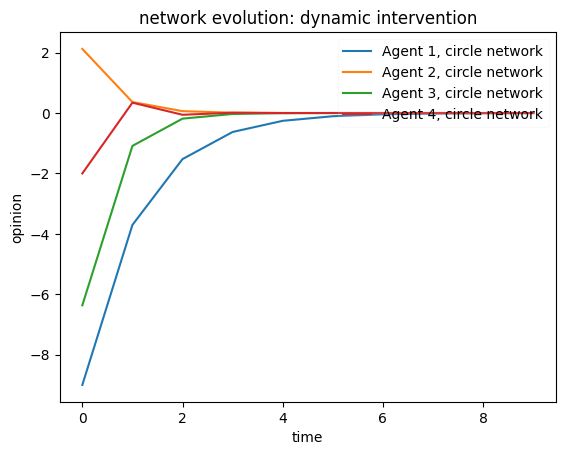

In [9]:
for i in range(4):
    plt.plot(range(10), [x_sequence_1i[j][i].item() for j in range(10)], label = f"Agent {i+1}, circle network")
    
plt.xlabel("time")
plt.ylabel("opinion")
plt.legend(framealpha = 0.1, loc = "upper right")
plt.title("network evolution: dynamic intervention")
plt.show()

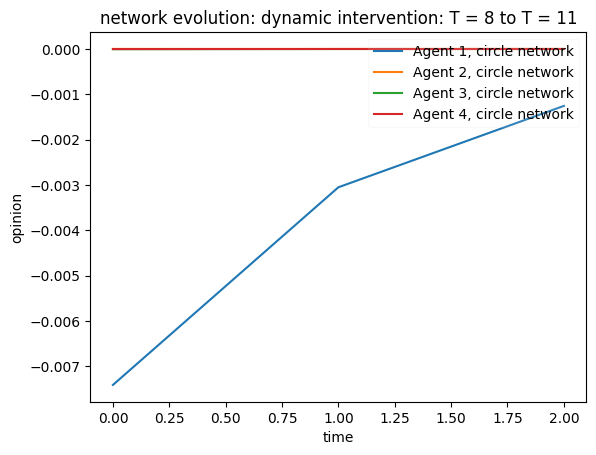

In [10]:
for i in range(4):
    plt.plot(range(3), [x_sequence_1i[j][i].item() for j in range(8, 11)], label = f"Agent {i+1}, circle network")
    
plt.xlabel("time")
plt.ylabel("opinion")
plt.legend(framealpha = 0.1, loc = "upper right")
plt.title("network evolution: dynamic intervention: T = 8 to T = 11")
plt.show()

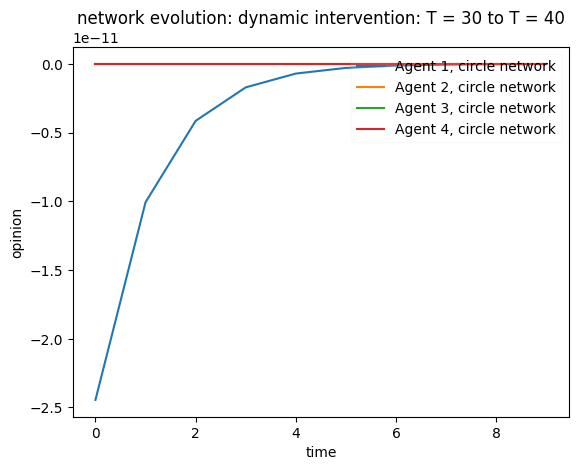

In [11]:
for i in range(4):
    plt.plot(range(10), [x_sequence_1i[j][i].item() for j in range(30, 40)], label = f"Agent {i+1}, circle network")
    
plt.xlabel("time")
plt.ylabel("opinion")
plt.legend(framealpha = 0.1, loc = "upper right")
plt.title("network evolution: dynamic intervention: T = 30 to T = 40")
plt.show()

Note that the y-axis is multiplied by $10^{-11}$ as indicated on the plot, meaning that the scale is very small.